# SÉRIE


In [7]:
import math

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ===========================================================================================

frequency = 1.0e9  # Frequency in Hz

inductance = 6.8e-6  # Inductance in H
capacitance = 0.1e-6  # Capacitance in F
resistance_i = 10000.0  # Resistance in Ohm
resistance_p = 30.0  # Resistance in Ohm

In [8]:
# Calculo da impedância de XL: 
def calculate_xl(frequency, inductance):
    # Xl = 2 * Pi * f * L
    return 2 * math.pi * frequency * inductance


# Calculo da impedância de XC:
XL = calculate_xl(frequency, inductance)

print("XL = ", XL, "Ohm")

XL =  42725.66008882119 Ohm


In [9]:
# Calculo da impedância de XC:
def calculate_xc(frequency, capacitance):
    # Xc = 1 / (2 * Pi * f * C)
    return 1 / (2 * math.pi * frequency * capacitance)

# Calculo da impedância de XC:
XC = calculate_xc(frequency, capacitance)

print("XC = ", XC, "Ohm")

XC =  0.0015915494309189533 Ohm


In [10]:
# Zeq = (Ri + Rp) + XL + XC

# tal que: 

# - RI = Resistência de irradiação (>> que Rp)

# - Rp = Resistência de perdas 

# - XL = Reatância indutiva

# - XC = Reatância capacitiva

Zeq = (resistance_i + resistance_p) + XL + XC
print("Zeq = ", Zeq, "Ohm")


Zeq =  52755.66168037062 Ohm


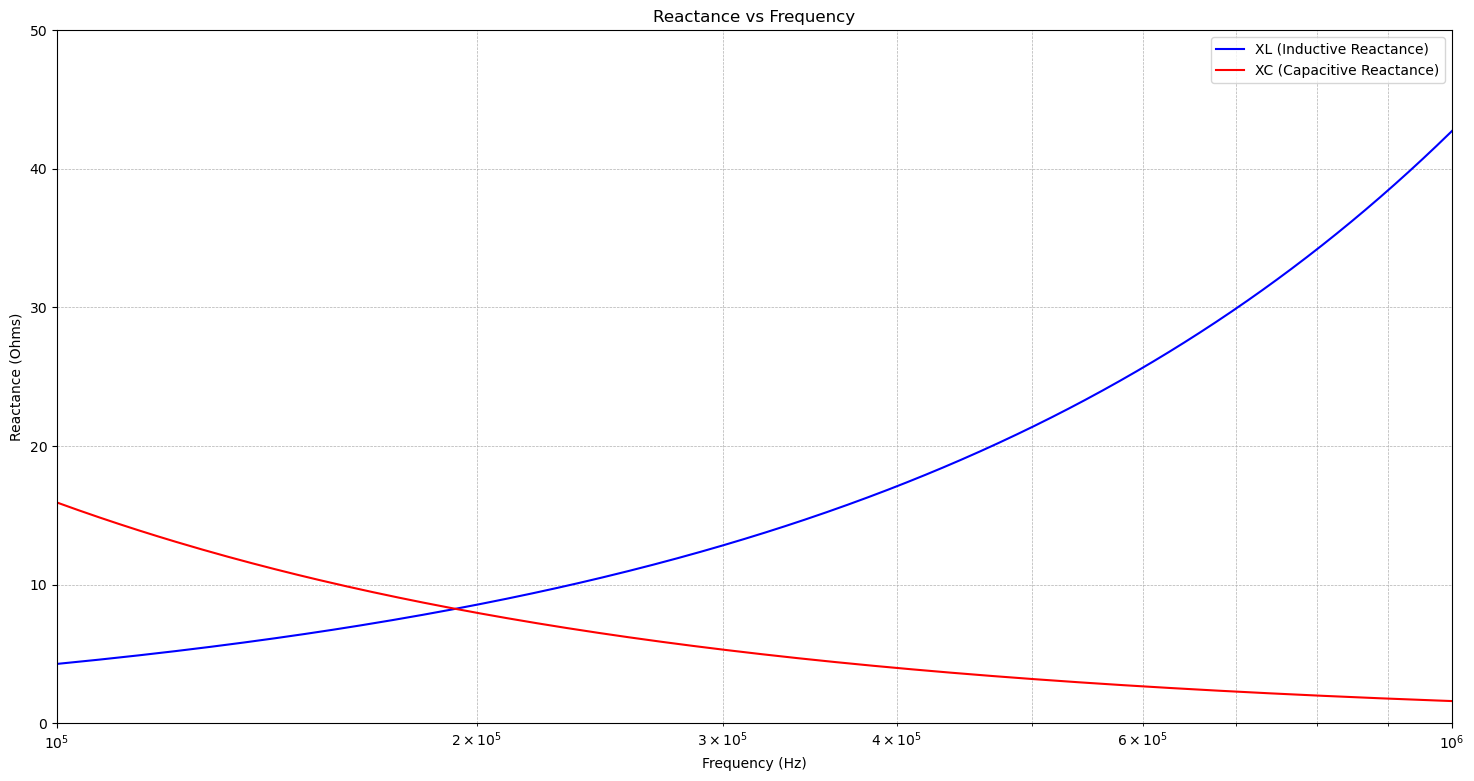

In [18]:
# Frequências de 10 kHz a 100 kHz (ajustado para melhor visibilidade)
multiplyer = 1e5

frequencies = np.linspace(1*multiplyer, 10*multiplyer, 500)  # 500 pontos para suavizar o gráfico

# Cálculo de XL e XC
XL_values = 2 * np.pi * frequencies * inductance
XC_values = 1 / (2 * np.pi * frequencies * capacitance)

# Plot
plt.figure(figsize=(18, 9))
plt.plot(frequencies, XL_values, label='XL (Inductive Reactance)', color='blue')
plt.plot(frequencies, XC_values, label='XC (Capacitive Reactance)', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Reactance (Ohms)')
plt.title('Reactance vs Frequency')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(1*multiplyer, 10*multiplyer)
# plt.xticks(np.arange(1*multiplyer, 50*multiplyer+1, 10*multiplyer/500))
plt.ylim(0, 50)

#escala em log

plt.xscale('log')

plt.show()

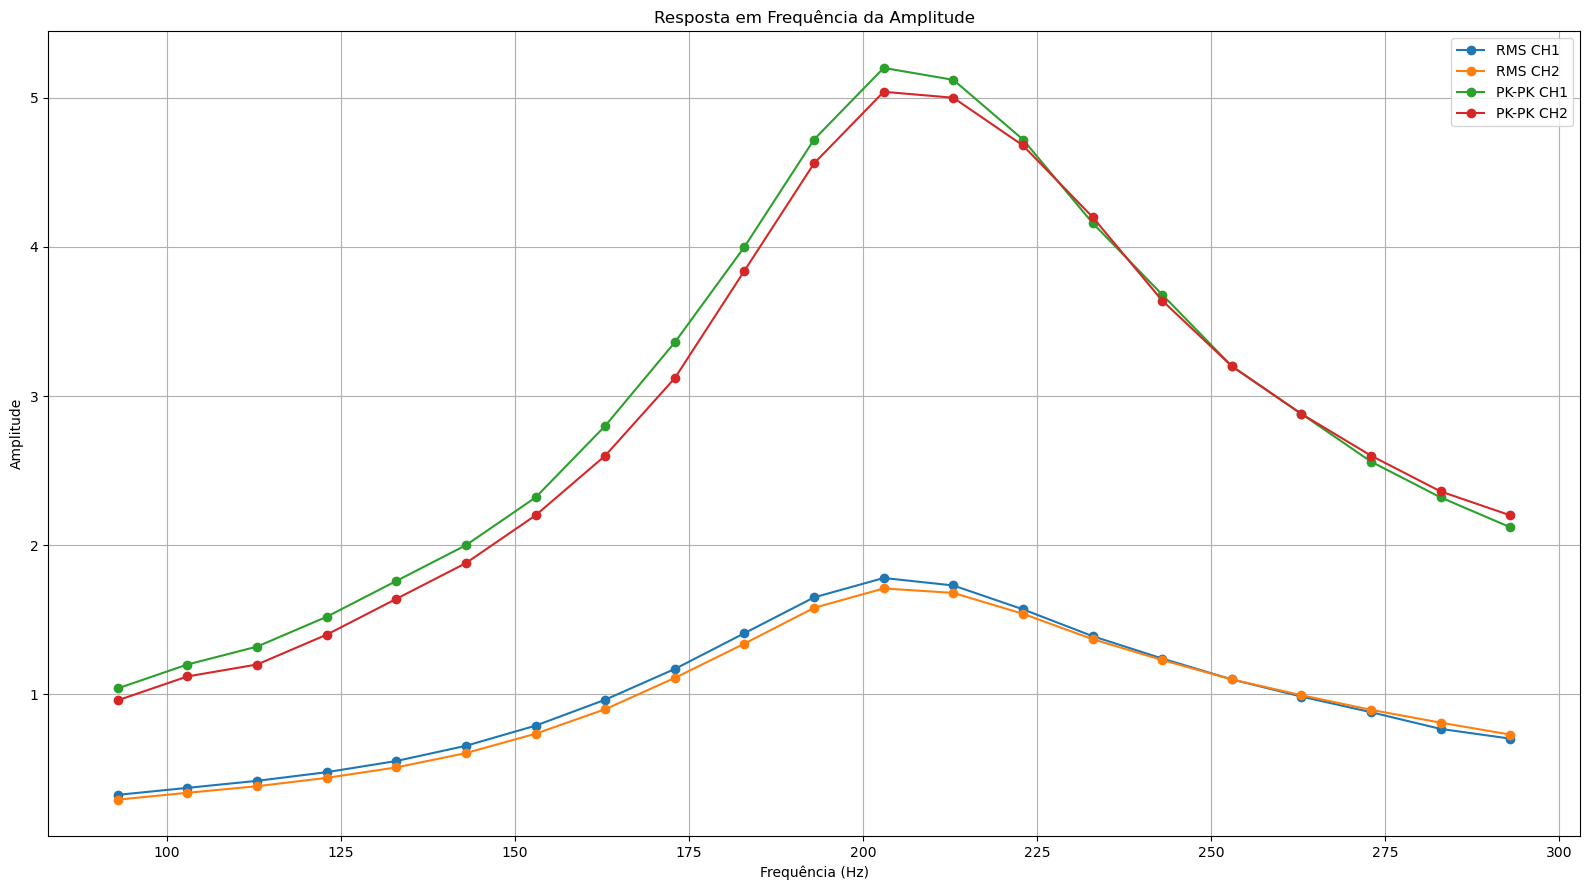

In [21]:
import matplotlib.pyplot as plt

# Dados
freq = [
    93, 103, 113, 123, 133, 143, 153, 163, 173, 183,
    193, 203, 213, 223, 233, 243, 253, 263, 273, 283, 293
]

rms_ch1 = [
    0.326, 0.373, 0.42, 0.478, 0.553, 0.655, 0.79, 0.964, 1.17, 1.41,
    1.65, 1.78, 1.73, 1.57, 1.39, 1.24, 1.1, 0.985, 0.88, 0.768, 0.703
]

rms_ch2 = [
    0.294, 0.34, 0.384, 0.44, 0.51, 0.606, 0.736, 0.9, 1.11, 1.34,
    1.58, 1.71, 1.68, 1.54, 1.37, 1.23, 1.1, 0.994, 0.896, 0.81, 0.73
]

pkpk_ch1 = [
    1.04, 1.2, 1.32, 1.52, 1.76, 2, 2.32, 2.8, 3.36, 4,
    4.72, 5.2, 5.12, 4.72, 4.16, 3.68, 3.2, 2.88, 2.56, 2.32, 2.12
]

pkpk_ch2 = [
    0.96, 1.12, 1.2, 1.4, 1.64, 1.88, 2.2, 2.6, 3.12, 3.84,
    4.56, 5.04, 5, 4.68, 4.2, 3.64, 3.2, 2.88, 2.6, 2.36, 2.2
]  # Corrigido valor estranho de 236 se necessário

# Plot
plt.figure(figsize=(16, 9))
plt.plot(freq, rms_ch1, label='RMS CH1', marker='o')
plt.plot(freq, rms_ch2, label='RMS CH2', marker='o')
plt.plot(freq, pkpk_ch1, label='PK-PK CH1', marker='o')
plt.plot(freq, pkpk_ch2, label='PK-PK CH2', marker='o')
plt.title('Resposta em Frequência da Amplitude')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


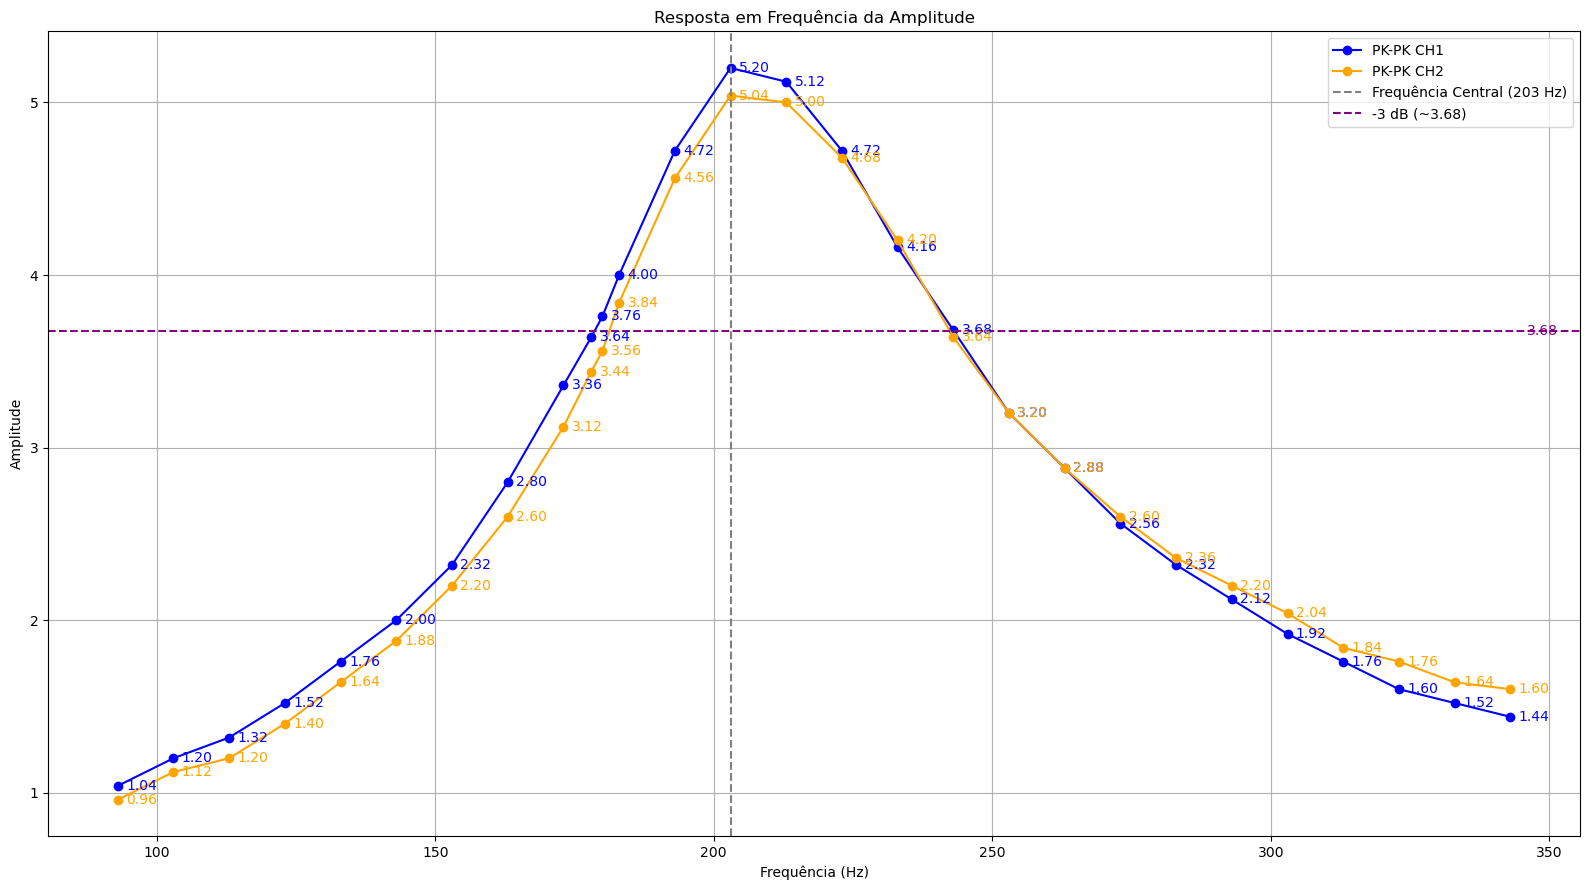

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
freq =     [93,   103,  113,  123,  133,  143,  153,  163, 173,  178, 180,   183,  193,  203,  213,  223,  233,  243,  253, 263,  273,  283,  293,  303,  313,  323,  333,  343]
pkpk_ch1 = [1.04, 1.2,  1.32, 1.52, 1.76, 2,    2.32, 2.8, 3.36, 3.64, 3.76, 4,    4.72, 5.2,  5.12, 4.72, 4.16, 3.68, 3.2, 2.88, 2.56, 2.32, 2.12, 1.92, 1.76, 1.6,  1.52, 1.44]
pkpk_ch2 = [0.96, 1.12, 1.2,  1.4,  1.64, 1.88, 2.2,  2.6, 3.12, 3.44, 3.56, 3.84, 4.56, 5.04, 5,    4.68, 4.2,  3.64, 3.2, 2.88, 2.6,  2.36, 2.2,  2.04, 1.84, 1.76, 1.64, 1.60]

# Calcular -3 dB (1/sqrt(2)) em relação ao maior valor
todos_os_valores = pkpk_ch1 + pkpk_ch2
max_val = max(todos_os_valores)
linha_corte = max_val / np.sqrt(2)

# Plot
plt.figure(figsize=(16, 9))

# Plots
cores = ['blue', 'orange']
for dados, label, cor in zip(
    [pkpk_ch1, pkpk_ch2],
    ['PK-PK CH1', 'PK-PK CH2'],
    cores
):
    plt.plot(freq, dados, label=label, marker='o', color=cor)
    # Adiciona texto à direita de cada ponto
    for f, a in zip(freq, dados):
        plt.text(f + 1.5, a, f'{a:.2f}', fontsize=10, ha='left', va='center', color=cor)

# Linha vertical na frequência central
plt.axvline(x=203, color='gray', linestyle='--', label='Frequência Central (203 Hz)')

# Linha horizontal de -3 dB com valor anotado
plt.axhline(y=linha_corte, color='purple', linestyle='--', label='-3 dB (~{:.2f})'.format(linha_corte))
plt.text(freq[-1] + 3, linha_corte, f'{linha_corte:.2f}', color='purple', fontsize=10, va='center')

plt.title('Resposta em Frequência da Amplitude')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
